In [1]:
import glob
import os
import pandas as pd
import yaml
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../../../../utils")
from absolute_path_builder import AbsolutePathBuilder

In [2]:
sns.set()

In [3]:
models = {
    "perspective_score": "Perspective",
    "flair_score": "Flair",
    "textblob_score": "Textblob",
    "vader_score": "Vader",
    "detoxify_original_score": "Detoxify",
    "detoxify_unbiased_score": "Detoxify Unbiased",
    "detoxify_multilingual_score": "Detoxify Multilingual"
}

In [4]:
DATASET = "twitter"

data_path = AbsolutePathBuilder.get_path(
    f"05_{DATASET}_features",
    filepaths="../../../../config/filepaths.yaml"
)

img_path = AbsolutePathBuilder.get_path(
    f"{DATASET}_imgs",
    filepaths="../../../../config/filepaths.yaml"
)

In [5]:
filenames = [file.split("/")[-1] for file in glob.glob(os.path.join(data_path, "*"))]

In [6]:
df = pd.concat([pd.read_csv(os.path.join(data_path, file)) for file in filenames])

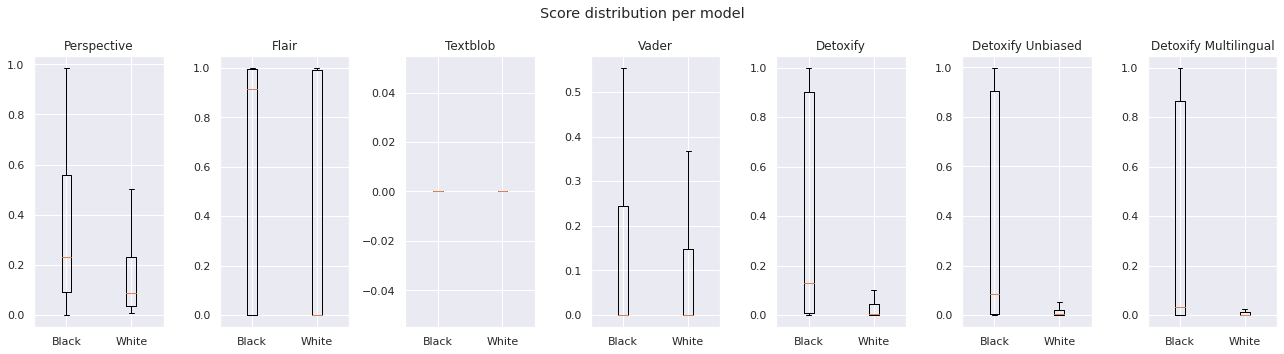

In [7]:
_, axs = plt.subplots(1, 7, figsize=(18,5))

for i, (col, model_name) in enumerate(models.items()):
    axs[i].boxplot(
        [
            df.loc[df.race == "Black", col].dropna(),
            df.loc[df.race == "White", col].dropna()
        ],
        showfliers=False,
        labels=["Black", "White"]
    )
    axs[i].set_title(f"{model_name}")

plt.suptitle("Score distribution per model")
plt.tight_layout()
plt.savefig(os.path.join(img_path, f"score_dist.pdf"))

plt.show()